In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_penjualan.txt to data_penjualan.txt


In [ ]:
import pandas as pd

file_path = list(uploaded.keys())[0]

df = pd.read_csv(file_path, delimiter='\t', encoding='utf-8')
print("Data Awal:")
print(df.head())

Data Awal:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH      ORDERDATE   STATUS  \
0        10100               30     100.00  1/6/2003 0:00  Shipped   
1        10100               50      67.80  1/6/2003 0:00  Shipped   
2        10100               22      86.51  1/6/2003 0:00  Shipped   
3        10100               49      34.47  1/6/2003 0:00  Shipped   
4        10101               25     100.00  1/9/2003 0:00  Shipped   

    PRODUCTLINE PRODUCTCODE                  CUSTOMERNAME       CITY DEALSIZE  
0  Vintage Cars    S18_1749  Online Diecast Creations Co.     Nashua   Medium  
1  Vintage Cars    S18_2248  Online Diecast Creations Co.     Nashua   Medium  
2  Vintage Cars    S18_4409  Online Diecast Creations Co.     Nashua    Small  
3  Vintage Cars    S24_3969  Online Diecast Creations Co.     Nashua    Small  
4  Vintage Cars    S18_2325          Blauer See Auto, Co.  Frankfurt   Medium  


In [ ]:
#membuat kolom penjualan di dataframe
df['SALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']
df[['PRODUCTLINE', 'QUANTITYORDERED', 'PRICEEACH', 'SALES']].head()

,PRODUCTLINE,QUANTITYORDERED,PRICEEACH,SALES
0,Vintage Cars,30,100.00,3000.00
1,Vintage Cars,50,67.80,3390.00
2,Vintage Cars,22,86.51,1903.22
3,Vintage Cars,49,34.47,1689.03
4,Vintage Cars,25,100.00,2500.00


In [ ]:
#menghitung total penjualan per productline
sales_per_line = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
print("Sales per Product Line:")
print(sales_per_line)


Sales per Product Line:
PRODUCTLINE
Classic Cars        2968546.40
Vintage Cars        1646013.29
Motorcycles          971086.29
Trucks and Buses     947355.18
Planes               877942.21
Ships                677940.40
Trains               203804.26
Name: SALES, dtype: float64


In [ ]:
#menghitung sales terbesar
max = sales_per_line.idxmax()
max_value = sales_per_line.max()

#menghitung sales terkecil
min = sales_per_line.idxmin()
min_value = sales_per_line.min()

print("\nHighest Sales:")
print(f"{max} - ${max_value:,.2f}")

print("\nLowest Sales:")
print(f"{min} - ${min_value:,.2f}")



Highest Sales:
Classic Cars - $2,968,546.40

Lowest Sales:
Trains - $203,804.26


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-9-2478790034.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_per_line.values, y=sales_per_line.index, palette="viridis")


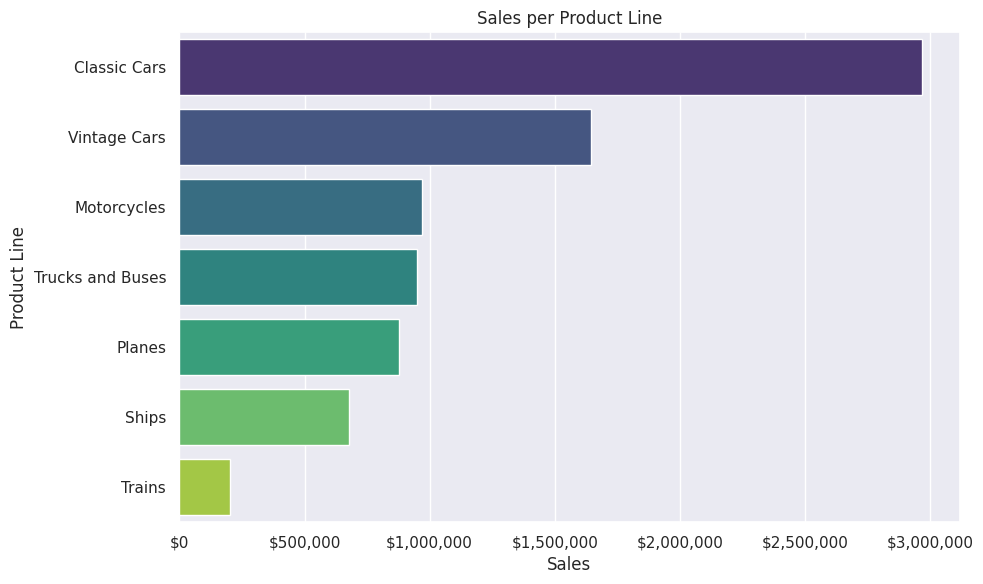

In [ ]:
#pengecekan ringan kolom penjualan
if 'SALES' not in df.columns:
  df['SALES'] = df['QUANTITYORDERED'] * df['PRICEEACH']

#set sytle chart
sns.set(style="darkgrid")
#mengatur ukuran chart
plt.figure(figsize=(10, 6))
#membuat chart
sns.barplot(x=sales_per_line.values, y=sales_per_line.index, palette="viridis")
#menambahkan judul dan label
plt.title("Sales per Product Line")
plt.xlabel("Sales")
plt.ylabel("Product Line")
#format angka
from matplotlib.ticker import FuncFormatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))
#menampilkan chart
plt.tight_layout()
plt.show()

In [ ]:
#menunjukkan kinerka dari waktu ke waktu dan membuat polanya
#mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2824 non-null   int64  
 1   QUANTITYORDERED  2824 non-null   int64  
 2   PRICEEACH        2824 non-null   float64
 3   ORDERDATE        2824 non-null   object 
 4   STATUS           2824 non-null   object 
 5   PRODUCTLINE      2824 non-null   object 
 6   PRODUCTCODE      2824 non-null   object 
 7   CUSTOMERNAME     2824 non-null   object 
 8   CITY             2824 non-null   object 
 9   DEALSIZE         2824 non-null   object 
 10  SALES            2824 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 242.8+ KB


In [ ]:
#merubah tipe data orderdate menjadi date
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ORDERNUMBER      2824 non-null   int64         
 1   QUANTITYORDERED  2824 non-null   int64         
 2   PRICEEACH        2824 non-null   float64       
 3   ORDERDATE        2824 non-null   datetime64[ns]
 4   STATUS           2824 non-null   object        
 5   PRODUCTLINE      2824 non-null   object        
 6   PRODUCTCODE      2824 non-null   object        
 7   CUSTOMERNAME     2824 non-null   object        
 8   CITY             2824 non-null   object        
 9   DEALSIZE         2824 non-null   object        
 10  SALES            2824 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 242.8+ KB


In [ ]:
#mengelompokkan penjualan per waktu (perbulan)
#membuat kolom bulan dari ORDERDATE
df['month'] = df['ORDERDATE'].dt.to_period('M')
#menghitung penjualan per bulan
monthly_sales = df.groupby('month')['SALES'].sum()

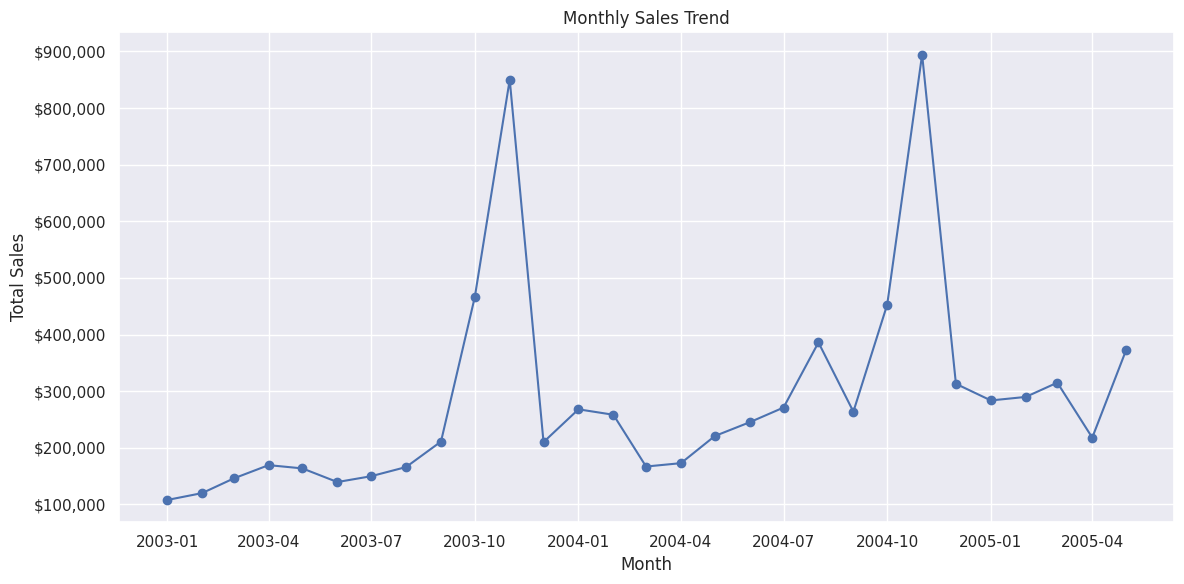

In [ ]:
#membuat grafik penjualan dari waktu ke waktu
monthly_sales.index = monthly_sales.index.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)

#format angka pada sumbu y
from matplotlib.ticker import FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.tight_layout()
plt.show()

In [ ]:
#memastikan kolom dealsize dan sales ada
df[['DEALSIZE', 'SALES']].head()

,DEALSIZE,SALES
0,Medium,3000.00
1,Medium,3390.00
2,Small,1903.22
3,Small,1689.03
4,Medium,2500.00


In [ ]:
#menghitung total penjualan persize
sales_per_size = df.groupby('DEALSIZE')['SALES'].sum().sort_values(ascending=False)
#menhitung total keseluruhan
total_sales = df['SALES'].sum()
#hitung kontribusi persen
kontribusi_persen = (sales_per_size / total_sales) * 100
#menggabungkan dalam satu tabel
hasil = pd.DataFrame({
    'Total Sales': sales_per_size,
    'Kontribusi Persen': kontribusi_persen
})

#format agar lebih rapih
hasil['Total Sales'] = hasil['Total Sales'].map('${:,.2f}'.format)
hasil['Kontribusi Persen'] = hasil['Kontribusi Persen'].map('{:.2f}'.format)

print("Kontribusi total penjualan berdasarkan DEALSIZE")
print(hasil)


Kontribusi total penjualan berdasarkan DEALSIZE
            Total Sales Kontribusi Persen
DEALSIZE                                 
Medium    $4,961,736.68             59.83
Small     $2,592,193.44             31.26
Large       $738,757.91              8.91
